Nome: Raquel Colares Santos 

Matrícula: 2022660190

##TP FINAL - Aprendizado de Máquina - UFMG
--------------------------------------------------------------------------------



#HEPATITE C



###Sumário


1.   Introdução
2.   Objetivo
3.   Bibliotecas
4.   Análise dos Dados
5.   Separação dos Dados em Treino e Teste
6.   Predições de modelos\
    6-1. Naive Bayes\
    6-2. Support Vector Machines\
    6-3. k-Nearest Neighbors\
    6-4. Decision Tree\
    6-5. Random Forest\
    6-6. Gradient Tree Boosting\
    6-7. Bagging Classifier\
    6-8. XGBoost Classifier\
    6-9. Logistic Regression\
    6-10. AdaBoost\
    6-11. LightGBM Classifier \
    6-12. Extra Trees Classifier
7.   Resultados\
    7-1. Comparação gráfica dos Modelos\
    7-2. Curva ROC\
    7-3. SHAP 
8.   Conclusão
9.   Referências

##1. Introdução

A Hepatite C é uma infecção causada por um vírus que ataca o fígado e leva à inflamação. Esse vírus é transmitido principalmente pelo contato com sangue contaminado, por exemplo ao compartilhar equipamentos não esterilizados. A tendência é os pacientes desenvolverem uma forma crônica da doença que leva a lesões graves no fígado. A hepatite C crônica pode resultar em problemas de saúde graves e até fatais, como cirrose e câncer de fígado. A evolução da enfermidade costuma ser lenta e o diagnóstico tardio, pois quando os sintomas aparecem são geralmente um sinal de doença hepática avançada. Não existe vacina para a hepatite C e a melhor forma de preveni-la é evitar comportamentos que possam disseminar a doença. Por isso há uma grande importância da realização de um diagnóstico precoce e o intuíto deste trabalho é analisar dados de Hepatite C e fazer uma predição de modelos de machine learning. A criação de um modelo preditivo pode levar a detecção precoce da hepatite C e outras doenças hepáticas permitindo o tratamento precoce. 




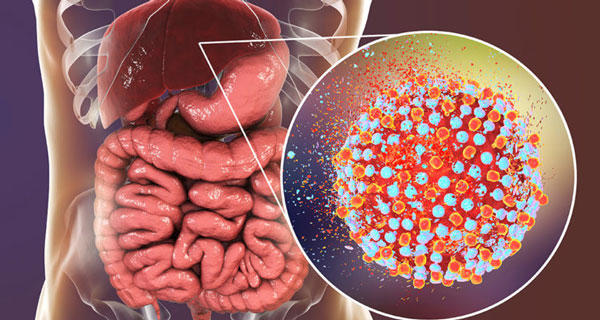




##2. Objetivo

O objetivo deste trabalho é analisar os dados de uma base de dados pública sobre Hepatite C, em anexo, fornecida pela University of California Irvine - UCI, e fazer predições de modelos de Machine Learning. Os modelos realizados serão Naive Bayes, Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), Decision Tree, Random Forest, Gradient Tree Boosting, Bagging Classifier, XGBoost Classifier, Logistic Regression, AdaBoost, LightGBM Classifier , Extra Trees Classifier.
Será utilizado e comparado métodos de classificação binária na predição dos modelos para determinar se o paciente tem ou não Hepatite C. 

##3. Bibliotecas 

A seguir temos todas as bibliotecas que serão utilizadas neste trabalho.

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 6.7 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report

import shap

import warnings
warnings.filterwarnings('ignore')

##4. Análise de Dados


A base de dados trabalhada nesse projeto está em um arquivo csv chamado "HepatitisCdata.csv" em anexo e que foi fornecida pela University of California Irvine (UCI) e após importado os dados será feita a análise e tratamento dos dados. Essa etapa consiste em preparar e organizar os dados visando a qualidade final dos dados que serão analisados e evitar impactos no modelo de previsão que será gerado.


Temos os seguintes dados:


*   **Category:** Categoria
*   **Age:** idade do paciente em anos
*   **Sex:** sexo do paciente 
*   **ALB:** quantidade de albumina no sangue do paciente
*   **ALP:** quantidade de fosfatase alcalina no sangue do paciente
*   **ALT:** quantidade de alanina transaminase no sangue do paciente
*   **AST:** quantidade de aspartato aminotransferase no sangue do paciente
*   **BIL:** quantidade de bilirrubina no sangue do paciente
*   **CHE:** quantidade de colinesterase no sangue do paciente
*   **CHOL:** quantidade de colesterol no sangue do paciente
*   **CREA:** quantidade de creatina no sangue do paciente
*   **GGT:** quantidade de gama-glutamil transferase no sangue do paciente
*   **PROT:** quantidade de proteína no sangue do paciente

In [3]:
## Importando os dados
hepatite = pd.read_csv('/content/HepatitisCdata.csv', index_col=0)

In [4]:
hepatite

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [5]:
# Analisando as dimensões do dataset
hepatite.shape

(615, 13)

In [6]:
# Analisando as informações do dataset  
hepatite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [7]:
#Analisando dados duplicados
print(format(hepatite.duplicated().sum()))

0


In [8]:
#Analisando valores nulos
hepatite.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

Podemos observar que há dados nulos no dataset e para isso precisamos tratar esses dados. Para isso substituiremos esses valores pela mediana. Feito isso é conferido se realmente não ficaram dados nulos. 

In [9]:
#Substituindo valores nulos
hepatite.fillna(hepatite.median(), inplace=True)

In [10]:
#Analisando se não há mais valores nulos
hepatite.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [11]:
# Imprimindo estatísticas resumidas
hepatite.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,10.055105,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


No dataset podemos observar que na columa categoria temos cinco tipos de categorias:
*   0=Blood Donor: Doador de sangue
*   0s=suspect Blood Donor: Doador de sangue suspeito
*   1=Hepatitis: Hepatite
*   2=Fibrosis: Fibrose
*   3=Cirrhosis: Cirrose

Já na coluna sexo temos também dois tipos:
*   f: feminino
*   m: masculino

Para realização dos modelos é feita a normalização dos dados para que seja uma distribuição normal (0,1). 


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

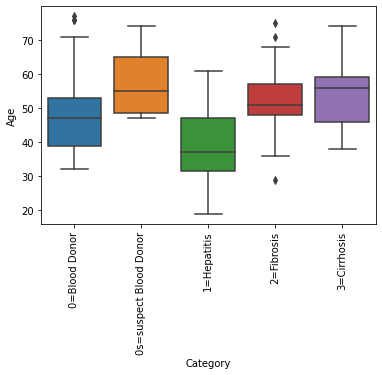

In [12]:
# Analisando graficamente as categorias por idade
sns.boxplot(data=hepatite, x='Category', y='Age')
plt.xticks(rotation=90)

In [13]:
#Normalizando os dados da coluna Categoria 
hepatite['Category'].replace('0=Blood Donor', 0, inplace=True)
hepatite['Category'].replace('0s=suspect Blood Donor', 0, inplace=True)
hepatite['Category'].replace('1=Hepatitis', 1, inplace=True)
hepatite['Category'].replace('2=Fibrosis', 1, inplace=True)
hepatite['Category'].replace('3=Cirrhosis', 1, inplace=True)

In [14]:
#Normalizando os dados da coluna Sexo
hepatite['Sex'].replace('f', 0, inplace=True)
hepatite['Sex'].replace('m', 1, inplace=True)

In [15]:
#Analisando a transformação realizada
hepatite.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [16]:
#Chegando se há a presença apenas de números para geração dos modelos
hepatite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 83.4 KB


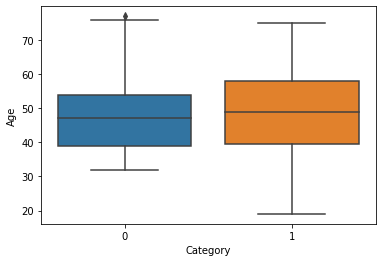

In [17]:
# Analisando graficamente as categorias por idade
sns.boxplot(data=hepatite, x='Category', y='Age')

É interessante para esse projeto analisar como os dados estão correlacionados. Para isso é feito um Heatmap, que é um mapa que irá permitir saber como as substâncias presentes no sangue interagem. Quanto mais quente for a cor da área no mapa, mais interações existem. E quanto mais fria for a cor, menos interações existem.


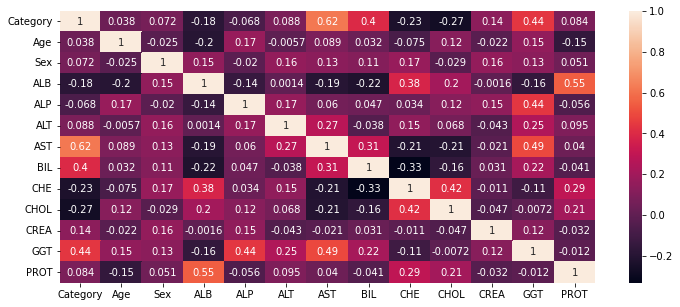

In [18]:
#Analisando as interações das substâncias presentes do sangue
plt.figure(figsize = (12,5))
sns.heatmap(hepatite.corr(), annot =True)

##5. Separação dos Dados em Treino e Teste

Nesse etapa do projeto, os dados serão separados em dados de Treino e de Teste para fazer as análises dos modelos, onde 25% dos dados serão para o treino. 

In [19]:
#Separação dos Dados
X = hepatite.drop(['Category'],axis=1)
y = hepatite['Category']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)


##6. Predição de Modelos

Com os dados analisados, tratados e separados em treino e teste, é feito os modelos Naive Bayes, Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), Decision Tree, Random Forest, Gradient Tree Boosting, Bagging Classifier, XGBoost Classifier, Logistic Regression, AdaBoost, LightGBM Classifier e Extra Trees Classifier para predição e determinação se o paciente tem ou não Hepatite C.

###6-1. Naive Bayes

O Naive Bayes é um classificador probabilístico baseado no Teorema de Bayes. Ele é simples, rápido e possui um desempenho relativamente maior que outros classificadores. Os classificadores Naive Bayes são altamente escaláveis.

Após criado o modelo pode-se oberservar pelo relatório de classificação que o modelo possui uma boa acurácia, aproximadamente 88%, e um recall e f1-score bem altos para a classe 0 (não possuem Hepatite C) e baixos para a classe 1 (possuem Hepatite C). 

In [20]:
#Criando o modelo Naive Bayes
def naive_bayes():
    gnb = GaussianNB()
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    return gnb

In [21]:
#Analisando o Naive Bayes
gnb = naive_bayes() 

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       128
           1       0.70      0.54      0.61        26

    accuracy                           0.88       154
   macro avg       0.81      0.75      0.77       154
weighted avg       0.87      0.88      0.88       154



In [22]:
#Valor da acurácia 
gnb_score = gnb.score(X_test,y_test)
gnb_score

0.8831168831168831

###6-2. Support Vector Machine

O modelo Support Vector Machine (SVM) é um classificador que busca minimizar o erro enquanto maximiza a margem que separa os seus dados. A função Kernel utilizada no SVM projeta os dados (pontos) em uma maior dimensão para que estes dados que não eram linearmente separáveis em uma dimensão menor, se tornem separáveis. É um classificador linear binário não probabilístico. Foi utilizado o classificador SVC e o Kernel linear.

Após criado o modelo pode-se oberservar pelo relatório de classificação que o modelo possui uma acurácia muito boa, aproximadamente 92%, e um recall e f1-score bem altos para a classe 0 (não possuem Hepatite C) e baixos para a classe 1 (possuem Hepatite C).

In [23]:
#Criando o modelo Support Vector Machine
def support_vector_machine(kernel):
    svm = SVC(kernel= kernel, gamma='auto', probability= True)
    svm = svm.fit(X_train, y_train)      
    y_pred = svm.predict(X_test)
   
    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    
    return svm  

In [24]:
#Analisando o kernel linear
svm = support_vector_machine(kernel='linear')

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       128
           1       0.89      0.62      0.73        26

    accuracy                           0.92       154
   macro avg       0.91      0.80      0.84       154
weighted avg       0.92      0.92      0.92       154



In [25]:
#Valor da acurácia
svm_score = svm.score(X_test,y_test)
svm_score

0.922077922077922

###6-3. k-Nearest Neighbors

O k-Nearest Neighbors (k-NN) é um algoritmo de fácil implementação e sua idéia consiste em separar os indivíduos em classes (grupo) de acordo com a sua semelhança. Para este projeto foi utilizado o classificador KNeighborsClassifier e foi variado o seu hiperparâmetro k número de vizinhos (n_neighbors) com valores de 10  e 50 para análise. 

Após criado o modelo pode-se oberservar pelo relatório de classificação e alterando o hiperparâmetro n_neighbors que o modelo possui uma boa acurácia, em torno de 83%, 88%. E apresenta um recall e f1-score bem altos para a classe 0 (não possuem Hepatite C) e muito baixos para a classe 1 (possuem Hepatite C).


In [26]:
#Criando o modelo k-Nearest Neighbors
def k_nearest_neighbors (n_neighbors):          
    knn = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors)
    knn = knn.fit(X_train, y_train)       
    y_pred = knn.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    return knn  

In [27]:
#Analisando o k-NN com 10 vizinhos 
knn = k_nearest_neighbors(n_neighbors = 10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       128
           1       0.90      0.35      0.50        26

    accuracy                           0.88       154
   macro avg       0.89      0.67      0.72       154
weighted avg       0.88      0.88      0.86       154



In [28]:
#Analisando o k-NN com 50 vizinhos 
knn = k_nearest_neighbors(n_neighbors = 50)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       128
           1       0.00      0.00      0.00        26

    accuracy                           0.83       154
   macro avg       0.42      0.50      0.45       154
weighted avg       0.69      0.83      0.75       154



In [29]:
#Valor da acurácia
knn_score = knn.score(X_test,y_test)
knn_score

0.8311688311688312

###6-4. Decision Tree

O modelo Decision Tree é utilizado de forma que cada nó representa uma pergunta sobre as devidas features, e assim filtra os dados até chegar nas folhas mostrando o resultado da classificação desejada. As árvores de decisão em que a variável de destino pode assumir valores contínuos (geralmente números reais) são chamadas de árvores de regressão. Para este projeto foi utilizado o classificador DecisionTreeClassifier e foi utilizado a altura máxima 10 e 50 da árvore (max_depth) para análise de resultados diversos. 

Após criado o modelo pode-se oberservar pelo relatório de classificação e pela alteração do hiperparâmetro max_depth, que o modelo possui uma acurácia muito boa, em torno de 94%. E apresenta um recall e f1-score bem altos para a classe 0 (não possuem Hepatite C) e bom valor para a classe 1 (possuem Hepatite C).

In [30]:
#Criando o modelo Decision Tree
def decision_tree(max_depth):
    dt = DecisionTreeClassifier(max_depth = max_depth)
    dt = dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    
    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 
    
    return dt

In [31]:
#Analisando os resultados com altura máxima = 10
dt = decision_tree(10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       128
           1       0.91      0.81      0.86        26

    accuracy                           0.95       154
   macro avg       0.94      0.90      0.92       154
weighted avg       0.95      0.95      0.95       154



In [32]:
#Analisando os resultados com altura máxima = 50
dt = decision_tree(50)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       128
           1       0.86      0.73      0.79        26

    accuracy                           0.94       154
   macro avg       0.91      0.85      0.88       154
weighted avg       0.93      0.94      0.93       154



In [33]:
#Valor da acurácia
dt_score = dt.score(X_test,y_test)
dt_score

0.935064935064935

###6-5. Random Forest

O modelo Random Forest é um dos modelos mais populares. Tem como propriedade criar muitas árvores de decisão, de maneira aleatória, formando uma floresta onde cada árvore será utilizada na escolha do resultado final.
É um método de aprendizado conjunto para classificação, regressão e outras tarefas, que operam construindo uma infinidade de árvores de decisão. Para este projeto foi utilizado o classificador RandomForestClassifier e foi variado o seu hiperparâmetro número de árvores, n_estimators, para análise. 

Após criado o modelo pode-se oberservar pelo relatório de classificação e pela alteração do hiperparâmetro n_estimators, que o modelo possui uma acurácia muito boa, em torno de 95%. E apresenta um recall e f1-score bem altos para a classe 0 (não possuem Hepatite C) e bom valor para a classe 1 (possuem Hepatite C).



In [34]:
#Criando o modelo Random Forest
def random_forest (n_estimators):           
    rf = ensemble.RandomForestClassifier(n_estimators = n_estimators)
    rf = rf.fit(X_train, y_train)       
    y_pred = rf.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    return rf

In [35]:
#Analisando o Random Forest com 10 números de árvore
rf = random_forest(n_estimators = 10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       128
           1       0.95      0.77      0.85        26

    accuracy                           0.95       154
   macro avg       0.95      0.88      0.91       154
weighted avg       0.95      0.95      0.95       154



In [36]:
#Analisando o Random Forest com 50 números de árvore
rf = random_forest(n_estimators = 50)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       128
           1       1.00      0.73      0.84        26

    accuracy                           0.95       154
   macro avg       0.97      0.87      0.91       154
weighted avg       0.96      0.95      0.95       154



In [37]:
#Valor da acurácia
rf_score = rf.score(X_test,y_test)
rf_score

0.9545454545454546

###6-6. Gradient Tree Boosting

O Gradient Tree Boosting constrói o modelo em etapas, permitindo a otimização de uma função de perda diferenciável através de uma técnica chamada boosting. O Gradient Boosting cria um modelo aditivo em um estágio avançado e em cada estágio as árvores de regressão de n classes são ajustadas no gradiente negativo da função de perda de desvio binomial ou multinomial. Foi usado o classificador GradientBoostingClassifier e foi variado o seu hiperparâmetro n_estimators, correspondente ao seu número de iterações. 

Após criado o modelo pode-se oberservar pelo relatório de classificação e pela alteração do hiperparâmetro n_estimators, que o modelo possui uma acurácia muito boa, em torno de 93%, 94%. E apresenta um recall e f1-score bem altos para a classe 0 (não possuem Hepatite C) e bom valor para a classe 1 (possuem Hepatite C).

In [38]:
#Criando o modelo Gradient Tree Boosting
def gradient_tree_boosting(n_estimators):          
    gtb = ensemble.GradientBoostingClassifier(n_estimators = n_estimators)
    gtb = gtb.fit(X_train, y_train)
    y_pred = gtb.predict(X_test)
       
    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    return gtb 

In [39]:
#Analisando o Gradient Tree Boosting com 10 números de iterações
gtb = gradient_tree_boosting(n_estimators = 10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       128
           1       1.00      0.58      0.73        26

    accuracy                           0.93       154
   macro avg       0.96      0.79      0.85       154
weighted avg       0.93      0.93      0.92       154



In [40]:
#Analisando o Gradient Tree Boosting com 50 números de iterações
gtb = gradient_tree_boosting(n_estimators = 50)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       128
           1       0.95      0.69      0.80        26

    accuracy                           0.94       154
   macro avg       0.94      0.84      0.88       154
weighted avg       0.94      0.94      0.94       154



In [41]:
#Valor da acurácia
gtb_score = gtb.score(X_test,y_test)
gtb_score

0.9415584415584416

###6-7. Bagging Classifier

O modelo Bagging Classifier é um meta-estimador de conjunto que ajusta os classificadores base em subconjuntos aleatórios do conjunto de dados original e, em seguida, agrega suas previsões individuais para formar uma previsão final. Tal meta-estimador normalmente pode ser usado como uma forma de reduzir a variância de um estimador caixa-preta introduzindo a randomização em seu procedimento de construção e, em seguida, fazendo um ensemble a partir dele.

Após criado o modelo pode-se oberservar pelo relatório de classificação que o modelo possui uma acurácia muito boa, aproximadamente 92% E apresenta um recall e f1-score muito altos para a classe 0 (não possuem Hepatite C) e bons para a classe 1 (possuem Hepatite C).


In [42]:
#Criando o modelo Bagging Classifier
def bagging_classifier():
    bgg = BaggingClassifier()
    bgg.fit(X_train, y_train)
    y_pred = bgg.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    return bgg 


In [43]:
#Analisando o Bagging Classifier
bgg = bagging_classifier()

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       128
           1       0.84      0.62      0.71        26

    accuracy                           0.92       154
   macro avg       0.88      0.80      0.83       154
weighted avg       0.91      0.92      0.91       154



In [44]:
#Valor da acurácia
bgg_score = bgg.score(X_test,y_test)
bgg_score

0.9155844155844156

###6-8. XGBoost Classifier

O modelo XGBoost Classifier significa extreme gradient boosting. É um método de árvore de conjunto que aplica o princípio de impulsionar usando a arquitetura gradiente descendente. O XGBoost aprimora a estrutura básica do Gradient Boosting Machines (GBM) por meio de otimização de sistemas e aprimoramentos algorítmicos. O XGBoost Classifier foi projetado para velocidade e desempenho.

Após criado o modelo pode-se oberservar pelo relatório de classificação que o modelo possui uma acurácia excelente, aproximadamente 97%. E apresenta um recall e f1-score bem altos para a classe 0 (não possuem Hepatite C) e também altos para a classe 1 (possuem Hepatite C).

In [45]:
#Criando o modelo XGBoost Classifier
def xgb_classifier():
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    return xgb 

In [46]:
#Analisando o XGBoost Classifier
xgb = xgb_classifier()

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.92      0.92      0.92        26

    accuracy                           0.97       154
   macro avg       0.95      0.95      0.95       154
weighted avg       0.97      0.97      0.97       154



In [47]:
#Valor da acurácia
xgb_score = xgb.score(X_test,y_test)
xgb_score

0.974025974025974

###6-9. Logistic Regression

O modelo Logistic Regression permite a predição de valores tomados por uma variável categórica, frequentemente binária, em função de uma ou mais variáveis independentes contínuas e/ou binárias.

Após criado o modelo pode-se oberservar pelo relatório de classificação que o modelo possui uma acurácia muito boa, aproximadamente 91%. E apresenta um recall e f1-score bem altos para a classe 0 (não possuem Hepatite C) e baixos para a classe 1 (possuem Hepatite C).

In [48]:
#Criando o modelo Logistic Regression
def logistic_regression():
    log = LogisticRegression()
    log.fit(X_train, y_train)
    y_pred = log.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    return log

In [49]:
#Analisando o Logistic Regression
log = logistic_regression()

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       128
           1       0.83      0.58      0.68        26

    accuracy                           0.91       154
   macro avg       0.88      0.78      0.81       154
weighted avg       0.90      0.91      0.90       154



In [50]:
#Valor da acurácia
log_score = log.score(X_test,y_test)
log_score

0.9090909090909091

###6-10. AdaBoost 

O modelo AdaBoost é um meta-estimador que começa ajustando um classificador no conjunto de dados original e, em seguida, ajusta cópias adicionais do classificador no mesmo conjunto de dados, mas onde os pesos de instâncias classificadas incorretamente são ajustados de modo que os classificadores subsequentes se concentrem mais em casos difíceis.

Após criado o modelo pode-se oberservar pelo relatório de classificação que o modelo possui uma acurácia excelente, aproximadamente 99%. E apresenta um recall e f1-score muito altos tanto para a classe 0 (não possuem Hepatite C) quanto para a classe 1 (possuem Hepatite C).

In [51]:
#Criando o modelo AdaBoost
def ada_boost():
    ada = AdaBoostClassifier()
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    return ada

In [52]:
#Analisando o AdaBoost
ada = ada_boost()

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       128
           1       0.96      0.96      0.96        26

    accuracy                           0.99       154
   macro avg       0.98      0.98      0.98       154
weighted avg       0.99      0.99      0.99       154



In [53]:
#Valor da acurácia
ada_score = ada.score(X_test,y_test)
ada_score

0.987012987012987

###6-11. LightGBM Classifier 

O modelo LightGBM Classifier é uma estrutura de aumento de gradiente rápida, distribuída e de alto desempenho baseada em algoritmos de árvore de decisão. Ele divide a árvore em folha com o melhor ajuste, enquanto outros algoritmos de reforço dividem a árvore em profundidade ou em nível, em vez de folha. Portanto, ao crescer na mesma folha no LightGBM, o algoritmo de folha pode reduzir mais perdas do que o algoritmo de nível e, portanto, resulta em uma precisão muito melhor que raramente pode ser alcançada por qualquer um dos algoritmos de aumento existentes. Além disso, é surpreendentemente muito rápido.

Após criado o modelo pode-se oberservar pelo relatório de classificação que o modelo possui uma acurácia excelente, aproximadamente 99%. E apresenta um recall e f1-score muito altos tanto para a classe 0 (não possuem Hepatite C) quanto para a classe 1 (possuem Hepatite C).

In [54]:
#Criando o modelo LightGBM Classifier 
def lgbm_classifier():
    lgbm = LGBMClassifier()
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    return lgbm

In [55]:
#Analisando o LightGBM Classifier 
lgbm = lgbm_classifier()

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       128
           1       0.96      0.96      0.96        26

    accuracy                           0.99       154
   macro avg       0.98      0.98      0.98       154
weighted avg       0.99      0.99      0.99       154



In [56]:
#Valor da acurácia
lgbm_score = lgbm.score(X_test,y_test)
lgbm_score

0.987012987012987

###6-12. Extra Trees Classifier

O modelo Extra Trees Classifier implementa um meta estimador que ajusta um número de árvores de decisão aleatórias (também conhecidas como extra-árvores) em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo. Os valores padrão para os parâmetros que controlam o tamanho das árvores levam a árvores totalmente crescidas e não podadas que podem ser muito grandes em alguns conjuntos de dados. Para reduzir o consumo de memória, a complexidade e o tamanho das árvores devem ser controlados definindo esses valores de parâmetro.

Após criado o modelo pode-se oberservar pelo relatório de classificação que o modelo possui uma acurácia muito boa, aproximadamente 94%. E apresenta um recall e f1-score bem altos para a classe 0 (não possuem Hepatite C) e baixos para a classe 1 (possuem Hepatite C).

In [57]:
#Criando o modelo Extra Trees Classifier
def extra_trees(n_estimators):
    ext = ExtraTreesClassifier(n_estimators= n_estimators)
    ext.fit(X_train, y_train)
    y_pred = ext.predict(X_test)

    print('Relatório de classificação: \n', classification_report(y_test, y_pred)) 

    return ext

In [58]:
#Analisando o Extra Trees Classifier
ext = extra_trees(n_estimators=50)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       128
           1       1.00      0.62      0.76        26

    accuracy                           0.94       154
   macro avg       0.96      0.81      0.86       154
weighted avg       0.94      0.94      0.93       154



In [59]:
#Valor da acurácia
ext_score = ext.score(X_test,y_test)
ext_score

0.935064935064935

##7. Resultados

Após a realização de todos os modelos propostos nesse trabalho é feita uma análise dos resultados obtidos, a comparação gráfica deles, a utilização da curva ROC e explicação utilizando o SHAP.

###7-1. Comparação gráfica dos Modelos

A primeira análise a ser realizada é a de comparação dos modelos por meio da visualização das acurácias geradas com auxílio de um gráfico de barras. 

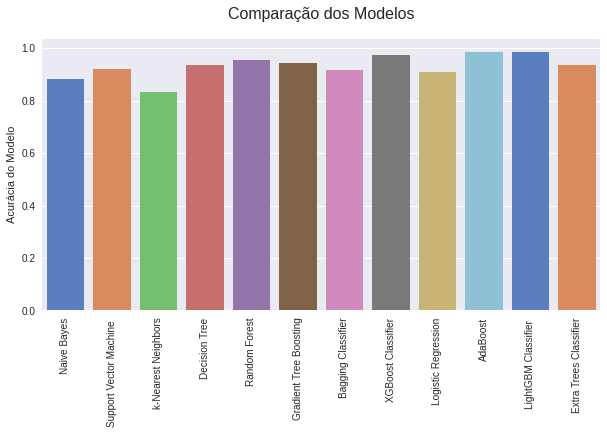

In [60]:
#Plotando visualização gráfica dos valores de acurácias das predições dos modelos 
plt.style.use('seaborn')

x = ['Naive Bayes', 
     'Support Vector Machine ', 
     'k-Nearest Neighbors', 
     'Decision Tree',
     'Random Forest',
     'Gradient Tree Boosting',
     'Bagging Classifier',
     'XGBoost Classifier',
     'Logistic Regression',
     'AdaBoost', 
     'LightGBM Classifier ',
     'Extra Trees Classifier']

y = [gnb_score,
     svm_score,
     knn_score,
     dt_score,
     rf_score,
     gtb_score,
     bgg_score,
     xgb_score,
     log_score,
     ada_score,
     lgbm_score,
     ext_score]

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=x,y=y, palette='muted');
plt.ylabel('Acurácia do Modelo')
plt.xticks(rotation=90)
plt.title('Comparação dos Modelos', fontsize=16, y=1.05);


Podemos observar que o modelo que teve a performance mais baixa foi o k-Nearest Neighbors (k-NN), e os que tiveram a maior perfomance foram XGBoost Classifier, AdaBoost e o LightGBM Classifier. Nota-se pelo gráfico que obtiveram valores de acurácia bem elevados próximos de 100%, o que evidência o cálculo da acurácia feito anteriormente. 
Para ter um resultado mais claro e completo será realizado a curva ROC e o SHAP para uma analise ainda mais aprofundada.  

###7-2. Curva ROC

A curva ROC (Receiver Operating Characteristic) e AUC são as métricas mais utilizadas para a avaliação modelos de Machine Learning. A curva ROC traça o True Positive Rate por False Positive Rate em diferentes classificações, serve para mostrar uma análise gráfica da sensibilidade e especificidade.
A AUC (Area Under the ROC Curve) é uma forma de resumir, definir a curva ROC em um único valor, agregando todos os limiares da ROC calculando a sua área sob a curva. Este valor varia de 0 a 1, e quanto maior a área melhor o valor.
Essas métricas serão utilizadas para analisarmos todos os modelos e definir qual o melhor modelo para este projeto.

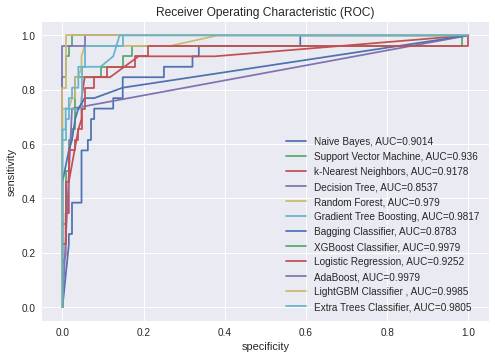

In [61]:
#Plotando a curva ROC para todos os modelos para realizar a análise:

plt.figure(0).clf()
plt.rcParams['figure.figsize'] = (12,8)

plt.title('Receiver Operating Characteristic (ROC)')
plt.ylabel('sensitivity')
plt.xlabel('specificity')


#Curva ROC para o modelo Naive Bayes
y_pred = gnb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Naive Bayes, AUC='+str(auc))

#Curva ROC para o modelo Support Vector Machine  
y_pred = svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Support Vector Machine, AUC='+str(auc))

#Curva ROC para o modelo k-Nearest Neighbors 
y_pred = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='k-Nearest Neighbors, AUC='+str(auc))

#Curva ROC para o modelo Decision Tree
y_pred = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Decision Tree, AUC='+str(auc))

#Curva ROC para o modelo Random Forest
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Random Forest, AUC='+str(auc))

#Curva ROC para o modelo Gradient Tree Boosting 
y_pred = gtb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Gradient Tree Boosting, AUC='+str(auc))

#Curva ROC para o modelo Bagging Classifier
y_pred = bgg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Bagging Classifier, AUC='+str(auc))

#Curva ROC para o modelo XGBoost Classifier
y_pred = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='XGBoost Classifier, AUC='+str(auc))

#Curva ROC para o modelo Logistic Regression  
y_pred = log.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Logistic Regression, AUC='+str(auc))

#Curva ROC para o modelo AdaBoost 
y_pred = ada.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='AdaBoost, AUC='+str(auc))

#Curva ROC para o modelo LightGBM Classifier   
y_pred = lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='LightGBM Classifier , AUC='+str(auc))

#Curva ROC para o modelo Extra Trees Classifier 
y_pred = ext.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr,tpr,label='Extra Trees Classifier, AUC='+str(auc))

plt.legend()
plt.show()

Os resultados obtidos pela AUC calculada pela curva ROC foram:

*   Naive Bayes: 90.14%
*   Support Vector Machines: 93.60%
*   k-Nearest Neighbors: 91.78%
*   Decision Tree: 85.37%
*   Random Forest: 97.90%
*   Gradient Tree Boosting: 98.17%
*   Bagging Classifier: 87.83%
*   XGBoost Classifier: 99.79%
*   Logistic Regression: 92.52%
*   AdaBoost: 99.79%
*   LightGBM Classifier: 99.85%
*   Extra Trees Classifier: 98.05%

Com o desenvolvimento da curva ROC podemos constatar e confirmar a análise previamente feita onde os modelos de maior perfomance foram XGBoost Classifier(99.79%), AdaBoost(99.79%) e o LightGBM Classifier(99.85%), porém com uma análise mais completa e detalhada apresentando os valores de acurácia dos modelos. 
Logo, os modelos mais precisos são LightGBM Classifier, AdaBoost juntamente com o XGBoost Classifier, Gradient Tree Boosting, Extra Trees Classifier, Random Forest, Support Vector Machines, Logistic Regression, k-Nearest Neighbors, Naive Bayes, Bagging Classifier e Decision Tree respectivamente para esse estudo.

O modelo LightGBM Classifier foi o modelo de maior acurácia de acordo com o esperado, pois conforme exlicado anteriormente ele é um modelo de alto desempenho, que resulta em uma precisão muito melhor e que raramente pode ser alcançada por qualquer um dos algoritmos existentes.


###7-3. SHAP

O SHAP ( Shapley Additive explanations) é uma ferramenta de visualização que pode ser usada para explicar a previsão de qualquer modelo calculando a contribuição de cada feature para a previsão. 

Existem muitos modelos de aprendizado de máquina que são muito precisos e de alto desempenho ao fazer previsões. Uma das limitações desses modelos é que não podemos explicar a qualidade dos resultados produzidos por eles e para isso o SHAP é usado para ajudar a tornar os resultados dos modelos de aprendizado de máquina mais explicáveis.

Para realizar a explicação utilizando o SHAP será considerado o modelo LightGBM Classifier que possui melhor desempenho conforme análise anterior no gráfico de barras e na curva ROC. 

In [62]:
#Plotando o SHAP para análise 

explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)

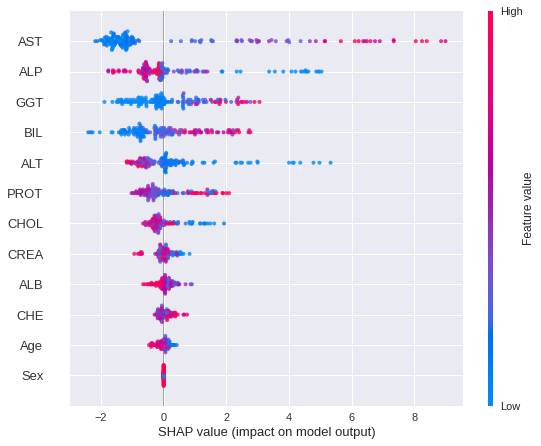

In [63]:
shap.summary_plot(shap_values[1], X_test, alpha=0.8)

O gráfico acima mostra o efeito de cada ponto de dados nas previsões. A cor mostra se esse recurso foi alto (high) ou baixo (low) para cada linha do conjunto de dados. 

A localização horizontal mostra se o efeito desse valor causou uma previsão mais alta ou mais baixa, onde cada linha horizontal representa o impacto de cada feature na saída do modelo. As features são ordenadas pela soma do valores SHAP em relação a todas as amostras. Os pontos a esquerda contribuem para a classificação 0 (não tem Hepatite C), e os a direita para a classificação 1 (possuem Hepatite C). 

Quanto mais longe do eixo central, maior a importância dessa features para a classificação do lado em que se encontra.
Temos assim, a feature AST (quantidade de aspartato aminotransferase no sangue do paciente), como a mais importante para o modelo LightGBM Classifier; indicando a feature que mais contribui para a classificação 1 que é a detecção de Hepatite C. 

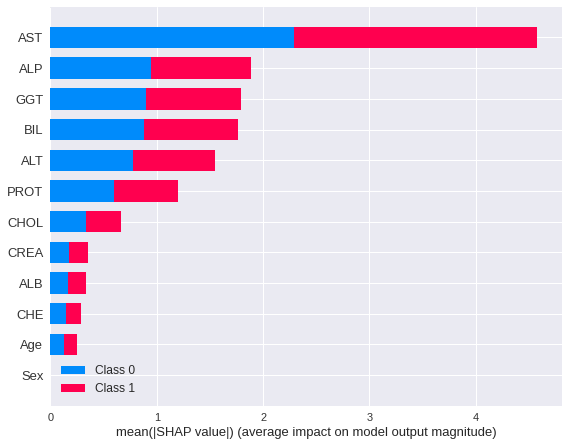

In [64]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

Já no gráfico de barras acima gerado pelo SHAP temos a representação do impacto médio das features na magnitude de saída do modelo. 

Nesse gráfico podemos notar a importância média de cada feature. Conforme também observado no gráfico de dispersão, a feature que mais se sobressaiu foi a AST (quantidade de aspartato aminotransferase no sangue do paciente), representando maior classificação 1 que é a detecção de Hepatite C. 

E isso de fato era o esperado pois a detecção de altos valores AST no sangue podem indicar doenças hepáticas, entre elas a Hepatite C. Um exame de sangue de AST solicitado pelo médico é para investigar lesões que comprometem o funcionamento normal do fígado, como hepatite ou cirrose. Logo, os valores obtidos pelo nosso modelo e pelo SHAP estão conforme esperado. 

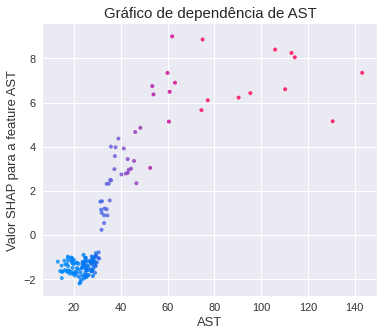

In [65]:
shap.dependence_plot('AST', shap_values[1], X_test, interaction_index='AST', alpha=0.8,show=False)
plt.title('Gráfico de dependência de AST',fontsize=15)
plt.ylabel('Valor SHAP para a feature AST')
plt.show()

Feito a análise das features e constato que a AST (quantidade de aspartato aminotransferase no sangue do paciente) foi a de maior impacto, pode-se analisá-la separadamente. 

Para analisar a AST separadamente utiliza-se o SHAP dependence plot. Ele mostra o efeito de uma única feature em relação ao restante do dataset, em como o impacto de cada variável muda à medida que a própria variável muda. É possível notar que quando a variável AST aumenta, o valor de SHAP também aumenta, ou seja, aproximando o paciente da nossa condição 1 (Hepatite C). Isso também é mostrado com a cor rosa representando aqueles que possuem a doença.

##8. Conclusão

Nesse projeto foi analisado dados públicos de Hepatite C e foram realizadas predições de doze modelos de machine learning, para predizer se o paciente tem ou não Hepatite C para o diagnóstico e tratamento precoce da doença. 

Com o auxílio da curva ROC foram determinas as acurácias para comparação dos modelos. Os modelos mais precisos são LightGBM Classifier, AdaBoost juntamente com o XGBoost Classifier, Gradient Tree Boosting, Extra Trees Classifier, Random Forest, Support Vector Machines, Logistic Regression, k-Nearest Neighbors, Naive Bayes, Bagging Classifier e Decision Tree, respectivamente para esse estudo.

O modelo LightGBM Classifier foi o modelo de maior acurácia de acordo com o esperado, pois é um modelo de alto desempenho, que resulta em uma precisão muito melhor e que raramente pode ser alcançada por qualquer um dos algoritmos existentes.

O SHAP foi utilizado para explicar a previsão do modelo calculando a contribuição de cada feature para a previsão.
A feature AST (quantidade de aspartato aminotransferase no sangue do paciente), foi a mais importante para o modelo LightGBM Classifier; indicando a feature que mais contribui para a classificação 1 que é a detecção de Hepatite C.
O SHAP também foi usado para análise separadamente da feature AST, de maior impacto; mostrando o efeito de uma única feature em relação ao restante do dataset, em como o impacto de cada variável muda à medida que a própria variável muda.

##9. Referências



**UCI - Machine Learning Repository** https://archive.ics.uci.edu/ml/datasets/HCV+data#

**Drauzio Varella: Doenças e Sintomas Hepatite C** https://drauziovarella.uol.com.br/doencas-e-sintomas/hepatite-c/

**Centers for Disease Control and Prevention (CDC-USA) - Hepatitis C**
https://www.cdc.gov/hepatitis/hcv/index.htm#:~:text=Hepatitis%20C%20is%20a%20liver,to%20prepare%20and%20inject%20drugs

**Scikit Learn** https://scikit-learn.org/stable/index.html

**Tua Saúde** https://www.tuasaude.com/exame-aspartato-aminotransferase/

Lichtinghagen R et al. J Hepatol 2013; 59: 236-42

Hoffmann G et al. **Using machine learning techniques to generate laboratory diagnostic pathways** â€“ a case study. J Lab Precis Med 2018; 3: 58-67

